<h1 style='text-align:center'> Iranian Telecom Churn </h1>
<h3 style='text-align:center'> ... </h3>

---
## Data Preparation

### Data Source

| Category | Description |
| --- | --- |
| URL | [University of California, Irvine (UCI) Machine Learning Repository: Iranian Churn](https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset) |
| License | [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0/legalcode) |


### Data Context

| Category | Description |
| --- | --- |
| Dataset Characteristics | Multivariate |
| Subject Area | Business |
| Associated Tasks | Classification, Regression |
| Feature Type | Integer, Binary, Continuous |
| # of Instances | 3150 |
| # of Features | 13 |

This dataset is randomly collected from an Iranian telecom company's database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value.

All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.

### Data Dictionary

| <div style="width:110px"> Variable Type | Role | Type | Description |
| --- | --- | --- | --- |
| Call Failure | Feature | Integer | Number of call failures |
| Complains | Feature | Binary | Binary attribute (0: No complaint, 1: Complaint) |
| Subscription Length | Feature | Integer | Total months of subscription |
| Charge Amount	| Feature | Integer	| Ordinal attribute (0: Lowest amount, 9: Highest amount) |
| Seconds of Use | Feature	| Integer | Total seconds of calls |
| Frequency of use | Feature | Integer | Total number of calls |
| Frequency of SMS | Feature | Integer | Total number of text messages |
| Distinct Called Numbers | Feature | Integer | Total number of distinct phone calls |
| Age Group | Feature | Integer | Ordinal attribute (1: Younger age, 5: Older age) |
| Tariff Plan | Feature	| Binary | Binary attribute (1: Pay as you go, 2: Contractual) |
| Status | Feature | Binary | Binary attribute (1: Active, 2: Non-active) |
| Age | Feature | Integer | *(Note: no description provided from data source)* |
| Customer Value | Feature | Continuous | The calculated value of customer (*Note: ambiguous description*) |
| Churn	| Target | Binary | Binary class label (0: Non-churn, 1: Churn) |

### Data ETL

Extract, transform, load (ETL) is a three-phase computing process where data is:
1. extracted from an input source: dalam project ini, data diektraksi langsung dari sumbernya menggunakan library yang disediakan oleh penyedia dataset, 
2. transformed: karena dataset telah tersedia dalam format DataFrame, maka tahapan ini cukup menggabungkan variabel dataset yang terpisahkan antara feature dengan target, and 
3. loaded into an output data container: berupa variable instance dalam bahasa pemrograman Python.

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
iranian_churn = fetch_ucirepo(id=563) 
  
X = iranian_churn.data.features 
y = iranian_churn.data.targets 

dataset = pd.concat(
    objs=[X, y],
    axis=1
)

dataset.head(n=5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


* data succesfully extracted from the input source, transformed to the appropriate format, and loaded into the variable instance
* dan ditampilkan 5 baris data pertama dari dataset sebagai contoh hasil dari tahapan ETL
* setiap baris dalam dataframe merepresentasikan satu *instance* dari pelanggan Telecom
* sedangkan kolom adalah variabel atau *feature* yang mewakili keragaman dari tiap pelanggan
* khusus untuk kolom terakhir merupakan *target*...

---

## Initial Data Analysis

Fase [data analisis awal](https://en.wikipedia.org/wiki/Data_analysis#Initial_data_analysis) akan berfokus untuk melakukan pengecekan terhadap: 
* **Karakteristik sampel data**: deskripsi dari struktur sampel data, dengan melihat statistik dasar dari important variables
* **Kualitas data**: menggunakan beragam tipe analisis, seperti frequency counts, descriptive statistics (mean, standard deviation, dan median), dan normality (skewness, kurtosis, dan frequentist test)
* **Extreme observations**: outlying observations in the data are analyzed to see if they seem to disturb the distribution.

Untuk memenuhi asumsi yang diperlukan dari model fitting dan uji hipotesis, serta melakukan transformasi terhadap data sejauh yang diperlukan.

### Data Audit

The data is audited or inspected with the use of statistical and database methods to detect anomalies and contradictions: this eventually indicates the characteristics of the anomalies and their locations.

In [2]:
df = dataset.copy()

*Copying into new dataframe*:
1. *To avoid reflecting modifications to the original dataset, and*
2. *To avoid [chained indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-view-versus-copy).*

In [3]:
def audit_data(data):
    audit_description = {
        "Row/Instance": data.shape[0],
        "Column/Variable": data.shape[1],
        "Integer Variable": len(data.select_dtypes(include="int64").columns),
        "Continuous Variable": len(data.select_dtypes(include="float64").columns),
        "Boolean Variable": len(data.select_dtypes(include="bool").columns),
        "Categorical Variable": len(data.select_dtypes(include="object").columns)
        }
    
    audit_result = {
        "Dtype": data.dtypes,
        "Duplicated": data.duplicated().sum(),
        "Missing": data.isna().sum(),
        "Unique": data.nunique(),
        "Sample": [data[column].unique() for column in data.columns]
        }
    
    return pd.DataFrame(data=audit_description, index=["Value"]).T,\
        pd.DataFrame(data=audit_result).rename_axis(index="Variable")

df_description, df_result = audit_data(data=df)

print("Data Description:")
display(df_description)
print("Data Audit:")
display(df_result)

Data Description:


,Value
Row/Instance,3150
Column/Variable,14
Integer Variable,13
Continuous Variable,1
Boolean Variable,0
Categorical Variable,0


Data Audit:


,Dtype,Duplicated,Missing,Unique,Sample
Variable,,,,,
Call Failure,int64,300,0,37,"[8, 0, 10, 3, 11, 4, 13, 7, 6, 9, 25, 2, 23, 2..."
Complains,int64,300,0,2,"[0, 1]"
Subscription Length,int64,300,0,45,"[38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 1..."
Charge Amount,int64,300,0,11,"[0, 1, 2, 3, 8, 4, 9, 7, 5, 10, 6]"
Seconds of Use,int64,300,0,1756,"[4370, 318, 2453, 4198, 2393, 3775, 2360, 9115..."
Frequency of use,int64,300,0,242,"[71, 5, 60, 66, 58, 82, 39, 121, 169, 83, 95, ..."
Frequency of SMS,int64,300,0,405,"[5, 7, 359, 1, 2, 32, 285, 144, 0, 8, 54, 483,..."
Distinct Called Numbers,int64,300,0,92,"[17, 4, 24, 35, 33, 28, 18, 43, 44, 25, 12, 32..."
Age Group,int64,300,0,5,"[3, 2, 1, 4, 5]"


* terdapat `3150` baris dalam dataset yang ditunjukkan dalam `Data Description`, baik yang berasal dari feature variable `X` maupun target variable `y`
* jumlah `14` kolom feature sesuai dengan yang telah dipaparkan dalam bagian `about dataset`, termasuk 1 kolom yang merupakan target variable 
* nama dari `14` kolom tersebut tertera dalam indeks `variable` pada `Data Audit`
* `int64` dan `float64` merupakan 2 tipe data di dalam dataset
    * Jumlah dari keempat tipe data tersebut ditunjukkan dalam DataFrame di atas:
        1. `int64`: `13` kolom
        2. `float64`: `1` kolom
    * beberapa tipe data sudah sesuai dengan random `Sample` yang ditunjukkan pada tiap variabel. semisal `Call Failure` yang memang berisikan bilangan bulat dan `Customer Value` berisikan bilangan desimal
    * namun pada variabel `Complains`, `Tariff Plan`, `Status`, dan `Churn`, variabel ini sebenarnya adalah representasi dari [binary attribute/data](https://en.wikipedia.org/wiki/Binary_data). pun demikian pada variabel `Charge Amount`, `Age Group`, dan `Age`, yang sebenarnya merepresentasikan [ordinal attribute/data](https://en.wikipedia.org/wiki/Ordinal_data)
        * sehingga tidak seharusnya tipe data dari variabel tersebut berupa integer
        * hal ini dikarenakan by [default](https://pandas.pydata.org/docs/user_guide/basics.html#defaults), any integer data will be casted as `int64` and float data as `float64` by Pandas
* terdeteksi `300` baris data yang terduplikasi, sebagaimana yang ditunjukkan pada nilai kolom `Duplicated` untuk seluruh variabel
    * satu alasan mengapa hal ini terjadi adalah tidak adanya unique identifier atau primary key yang membedakan tiap instance/baris data yang merepresentasikan satu pelanggan Telecom dengan pelanggan lainnya
    * pengaruh data yang terduplikasi pada bagian data analisis?
* tidak ada missing data yang terdeteksi, sebagaimana yang ditunjukkan pada kolom `Missing` yang bernilai `0` untuk seluruh variabel
* rentang nilai atau magnitude pada variabel numerikal bervariasi
    * mulai dari rentang satuan dan puluhan yang dicontohkan pada `Sample` variabel `Call Failure` (misal nilai `8` dan `10`) hingga ratusan dan ribuan pada variabel `Seconds of Use` (misal nilai `318` dan `4370`)
    * pengaruh magnitude pada data analisis?
* jumlah nilai atau kardinalitas pada variabel yang seharusnya bernilai kategorikal (variabel ordinal) masih bernilai wajar, sebagaimana yang ditunjukkan pada kolom `Unique` untuk feature `Age Group` dan `Age` yang bernilai `5` hingga feature `Charge Amount` yang bernilai `11`


| Anomaly | Insight | Action |
| --- | --- | --- |
| Data Type | **Data type issue detected** | Handled in `Data Cleaning` section |
| Duplicated Data | **Duplicated data detected** | Handled in `Data Cleaning` section |
| Missing Data | No missing data detected | No action needed |
| Variable Magnitude | **Variable magnitude issue detected** | ... |
| Cardinality | No cardinality issue detected | No action needed |

### Data Cleaning

Data cleansing or data cleaning is the process of identifying and correcting (or removing) corrupt, inaccurate, or irrelevant records from a dataset, table, or database. 
* It involves detecting incomplete, incorrect, or inaccurate parts of the data and then replacing, modifying, or deleting the affected data.
* The inconsistencies detected or removed may have been originally caused by user entry errors, by corruption in transmission or storage, or by different data dictionary definitions of similar entities in different stores.
* tahapan ini adalah penerapan dari [validity](https://en.wikipedia.org/wiki/Data_cleansing#Data_quality) dalam data science, karena: 
    1. values in a particular column must be of a particular data type, e.g., Boolean, numeric (integer or real), date.
    2. duplicated data...

#### Variable Name

sebelum memulai tahapan pembersihan data, perlu diperhatikan nama variabel dalam dataset sebagai berikut:

In [4]:
df.columns.to_list()

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

* nama variabel `Call  Failure`, `Subscription  Length`, dan `Charge  Amount` ternyata terpisahkan dengan dua karakter spasi
* separator ini tidak terdeteksi pada tahapan sebelumnya: bagian `variable` pada `data audit` tidak menunjukkan keanehan pada nama kolom dalam dataset
* untuk menjaga konsistensi penamaan variabel serta representasi dengan data dictionary, maka tahapan berikutnya akan:
    1. memisahkan string `str` object dalam tiap nama kolom
    2. menggabungkan string tersebut hanya dengan satu karakter spasi

In [5]:
df_columns_splitted = df.columns.str.split()
df.columns = df_columns_splitted.str.join(sep=" ")
df.columns.to_list()

['Call Failure',
 'Complains',
 'Subscription Length',
 'Charge Amount',
 'Seconds of Use',
 'Frequency of use',
 'Frequency of SMS',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

#### Data Type

* untuk `Complains` dan `Churn`, dua variabel ini dapat diubah tipe datanya menjadi `bool`, karena nilai yang terkandung dalam variabel ini sudah sesuai dengan *truth values* dalam [Boolean algebra](https://en.wikipedia.org/wiki/Boolean_algebra)
* sedangkan `Tariff Plan` dan `Status` akan diubah menjadi tipe data kategorikal `object`, untuk menjaga original values di dalam data dan juga representasi yang sama dengan data dictionary
* variabel ordinal `Charge Amount`, `Age Group`, dan `Age` juga akan diubah menjadi kategorikal

In [6]:
boolean_variables = ["Complains", "Churn"]
categorical_variables = ["Tariff Plan", "Status", "Charge Amount", "Age Group", "Age"]

for variable in boolean_variables:
    df[variable] = df[variable].astype(dtype="bool")
for variable in categorical_variables:
    df[variable] = df[variable].astype(dtype="object")

df.dtypes.to_frame(name="Dtype")

,Dtype
Call Failure,int64
Complains,bool
Subscription Length,int64
Charge Amount,object
Seconds of Use,int64
Frequency of use,int64
Frequency of SMS,int64
Distinct Called Numbers,int64
Age Group,object
Tariff Plan,object


#### Duplicated Data

In [7]:
df[df.duplicated()]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
518,0,False,37,0,0,0,0,0,2,1,2,25,0.00,True
628,0,False,35,0,0,0,0,0,2,1,2,25,0.00,True
718,0,False,37,0,0,0,0,0,2,1,2,25,0.00,True
728,0,False,36,0,0,0,0,0,3,1,2,30,0.00,True
901,0,False,38,0,0,0,0,0,2,1,2,25,0.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,False,19,2,6697,147,92,44,2,2,1,25,721.98,False
3146,17,False,17,1,9237,177,80,42,5,1,1,55,261.21,False
3147,13,False,18,4,3157,51,38,21,3,1,1,30,280.32,False
3148,7,False,11,2,4695,46,222,12,3,1,1,30,1077.64,False


* tampak rincian dari 300 baris data yang terduplikasi sesuai paparan pada bagian sebelumnya
* baris data ini memiliki duplikat pada $ 3150 - 300 = 2850 $ baris data lainnya (yang akan ditunjukkan berikutnya setelah menghapus duplicated data dari dataset)
* data yang terduplikasi akan dihapus dengan menyisakan the first occurences

In [8]:
df = df.drop_duplicates(keep="first")
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,False,38,0,4370,71,5,17,3,1,1,30,197.640,False
1,0,False,39,0,318,5,7,4,2,1,2,25,46.035,False
2,10,False,37,0,2453,60,359,24,3,1,1,30,1536.520,False
3,10,False,38,0,4198,66,1,35,1,1,1,15,240.020,False
4,3,False,38,0,2393,58,2,33,1,1,1,15,145.805,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,17,False,17,1,9237,177,80,42,5,1,1,55,261.210,False
3097,13,False,18,4,3157,51,38,21,3,1,1,30,280.320,False
3099,8,True,11,2,1792,25,7,9,3,1,1,30,100.680,True
3123,26,False,38,9,10740,99,8,44,5,2,1,55,174.585,False


#### Summary

In [9]:
df_cleaned_description, df_cleaned_result = audit_data(data=df)

print("Data Description:")
display(df_cleaned_description)
print("Data Audit:")
display(df_cleaned_result)

Data Description:


,Value
Row/Instance,2850
Column/Variable,14
Integer Variable,6
Continuous Variable,1
Boolean Variable,2
Categorical Variable,5


Data Audit:


,Dtype,Duplicated,Missing,Unique,Sample
Variable,,,,,
Call Failure,int64,0,0,37,"[8, 0, 10, 3, 11, 4, 13, 7, 6, 9, 25, 2, 23, 2..."
Complains,bool,0,0,2,"[False, True]"
Subscription Length,int64,0,0,45,"[38, 39, 37, 33, 36, 34, 35, 31, 27, 26, 25, 1..."
Charge Amount,object,0,0,11,"[0, 1, 2, 3, 8, 4, 9, 7, 5, 10, 6]"
Seconds of Use,int64,0,0,1756,"[4370, 318, 2453, 4198, 2393, 3775, 2360, 9115..."
Frequency of use,int64,0,0,242,"[71, 5, 60, 66, 58, 82, 39, 121, 169, 83, 95, ..."
Frequency of SMS,int64,0,0,405,"[5, 7, 359, 1, 2, 32, 285, 144, 0, 8, 54, 483,..."
Distinct Called Numbers,int64,0,0,92,"[17, 4, 24, 35, 33, 28, 18, 43, 44, 25, 12, 32..."
Age Group,object,0,0,5,"[3, 2, 1, 4, 5]"


* terdapat `2850` baris dalam dataset yang telah dibersihkan
* `14` kolom/variabel dalam dataset yang telah dibersihkan terdiri dari:
    1. Integer `int64`: `6` kolom
    2. Continuous `float64`: `1` kolom
    3. Boolean `bool`: `2` kolom
    4. Categorical `object`: `5` kolom
* tidak ada lagi data yang terduplikasi, sebagaimana yang ditunjukkan pada kolom `Duplicated` dari `Data Audit` pada tiap variabel bernilai `0`

### Data Distribution

An early step in any effort to analyze or model data should be to understand how the variables are distributed. Techniques for distribution visualization can provide quick answers to many important questions: 
* What range do the observations cover? 
* What is their central tendency? 
* Are they heavily skewed in one direction? 
* Is there evidence for bimodality? 
* Are there significant outliers? 
* Do the answers to these questions vary across subsets defined by other variables?

#### Numerical Variable

Analisis berikut dimulai dari feature numerik, yakni feature yang take on ordered numerical values. 
* Those values can be discrete, like integers, or continuous, like real numbers, and usually express a count or a measurement.
* tiap baris dalam visualisasi berikut mewakili tiap feature numerik, dan tiap kolom menampilkan 2 jenis visualisasi yang berbeda

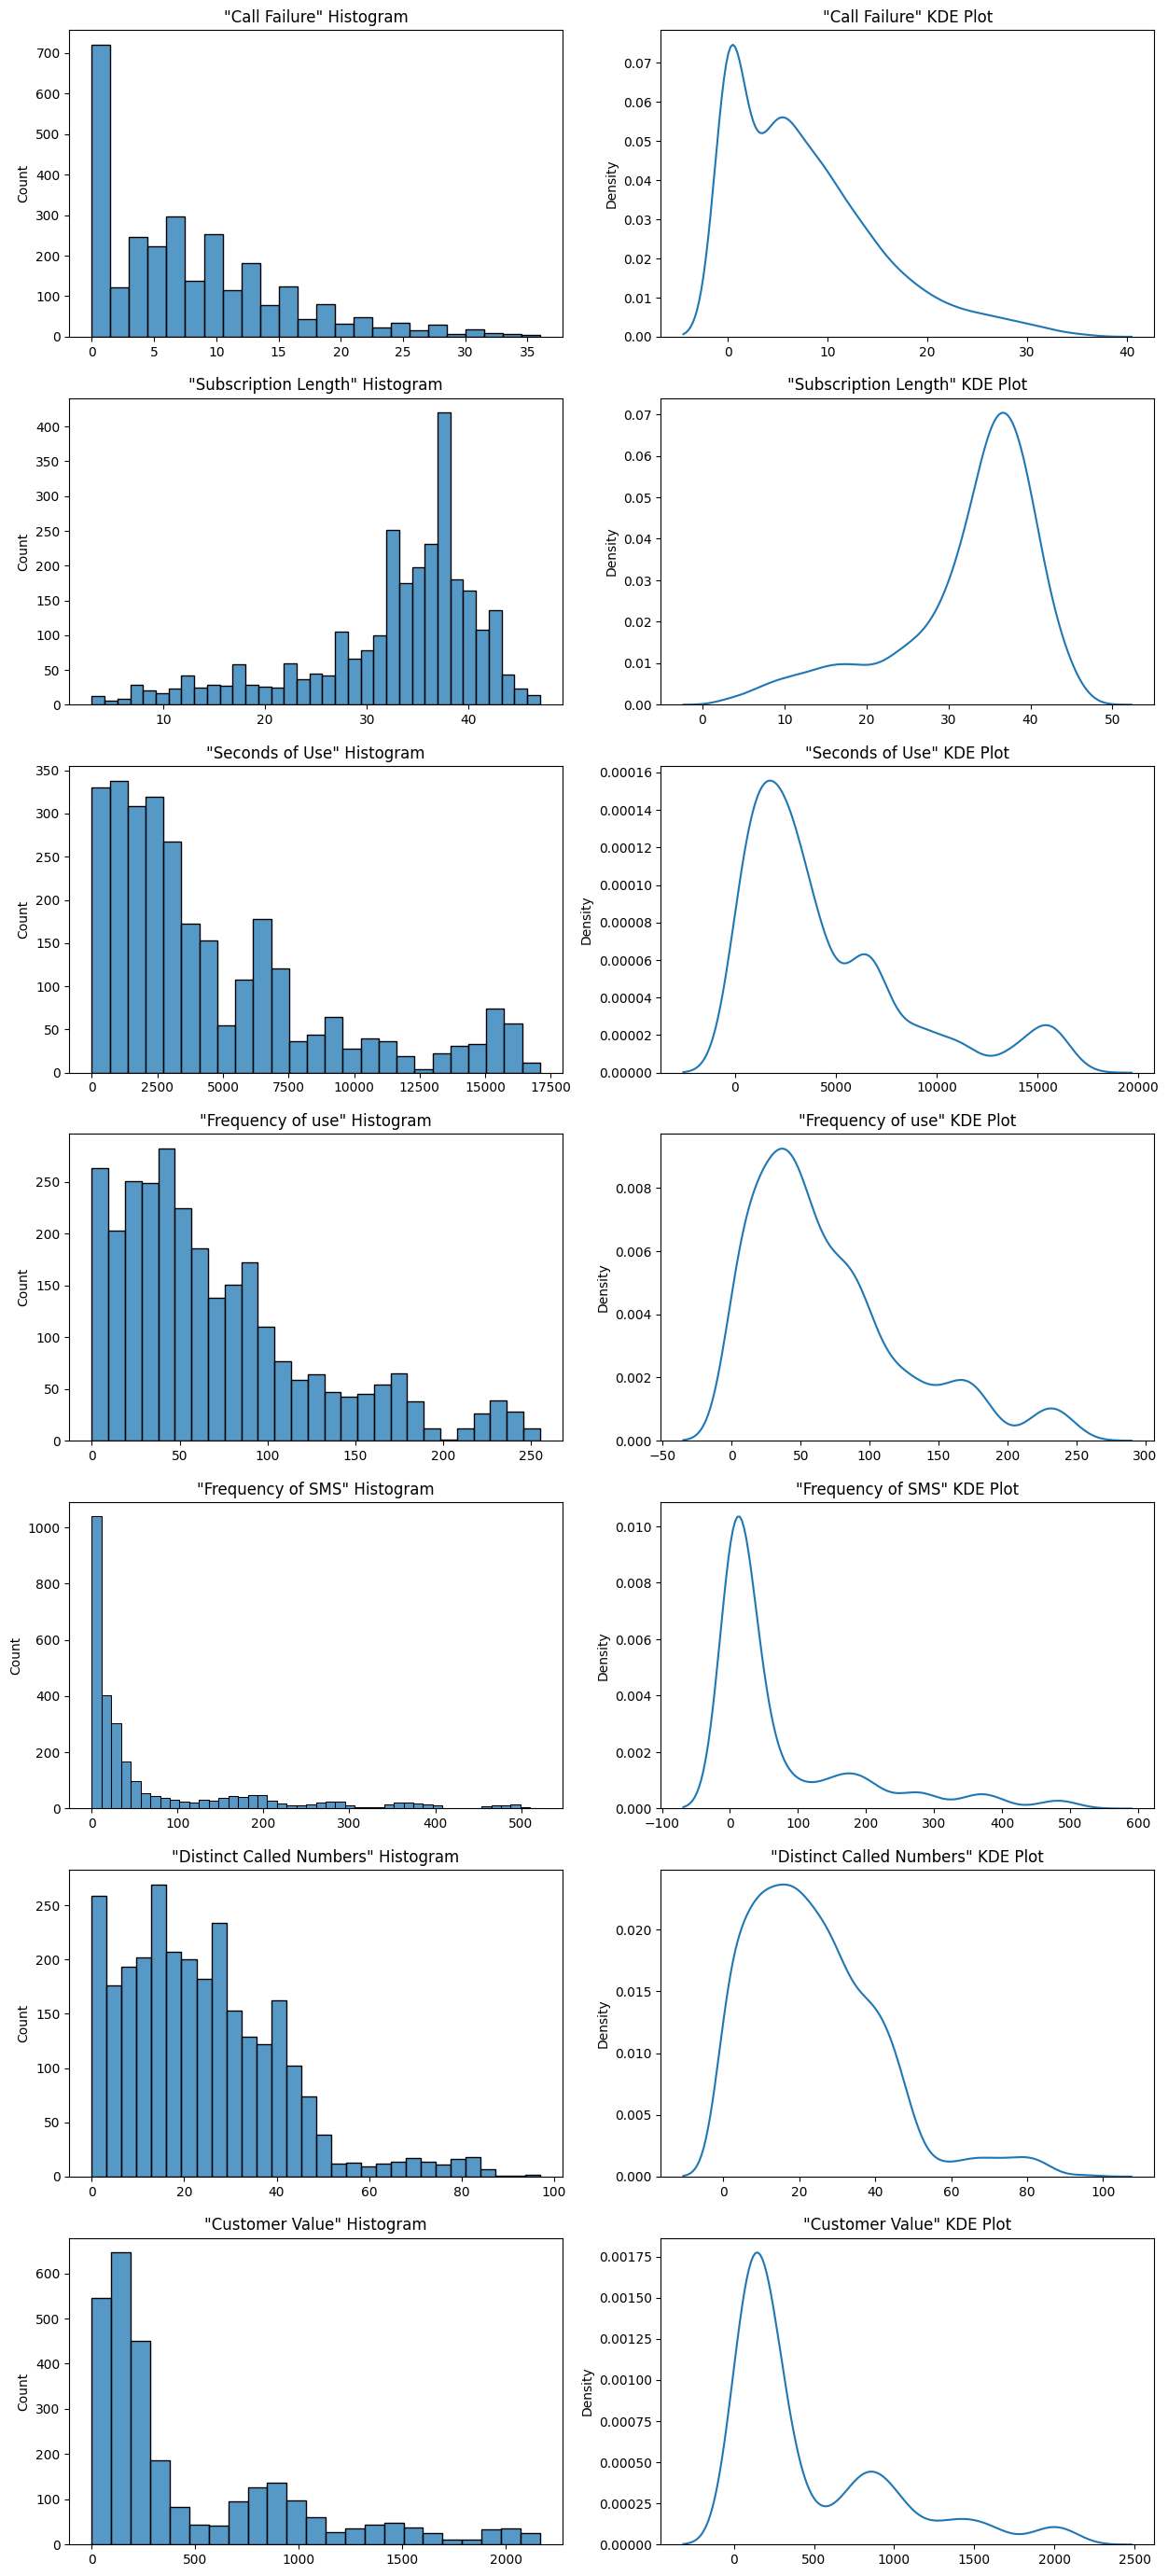

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include="number")

_, axes = plt.subplots(
   nrows=len(numerical_features.columns), 
   ncols=2,
   figsize=(15, 35)
)

for count, feature in enumerate(iterable=numerical_features):
    sns.histplot(
        data=numerical_features, 
        x=feature,
        bins="auto",
        ax=axes[count, 0]
    ).set(
        title=f'''"{feature}" Histogram''', 
        xlabel=None
    )
    
    sns.kdeplot(
        data=numerical_features, 
        x=feature, 
        ax=axes[count, 1]
    ).set(
        title=f'''"{feature}" KDE Plot''', 
        xlabel=None
    )

gambar di atas terdiri dari dua plot, yakni (1) histogram di sisi sebelah kiri dan (2) kernel density estimate (KDE) plot di sebelah kanan untuk tiap feature numerik
1. A histogram groups values into bins of equal value range. 
    * parameter `bins` di histogram secara default set to `auto`, yang mengacu pada [minimum bin width between the 'sturges' and 'fd' estimators](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html). 
    * dengan demikian, jumlah bins diatur secara arbitrary, dan bentuk histogram pun akan berbeda sesuai dengan jumlah bins yang ditetapkan.
2. KDE plot can be considered a [smoothed](https://en.wikipedia.org/wiki/Kernel_smoother) version of the histogram.
    * This is often a clearer way to grasp the distribution, because it does not depend on the size of the bins.
    * The area under the curve always adds up to 100%, and so the curve will never dip below the x-axis.

* You can also spot any skewness in its shape when the distribution is nearly regular but has some anomalies. 
    * Histogram di atas juga menunjukkan bahwa hampir semua feature memiliki positive skew (tail dari distribution memanjang ke arah kanan dari mass of distribution yang berada di sebelah kiri)
    * kecuali feature `Subscription Length` yang memiliki negative skew
* The shape of the histogram and KDE plot may contain clues about the underlying distribution type: Gaussian, exponential, etc.
    * Knowing the distribution of the feature becomes essential when we use predictive methods that assume a particular type (most often Gaussian).
    * dan dapat kita lihat secara visual seluruh feature dalam dataset memiliki distribusi non-parametrik

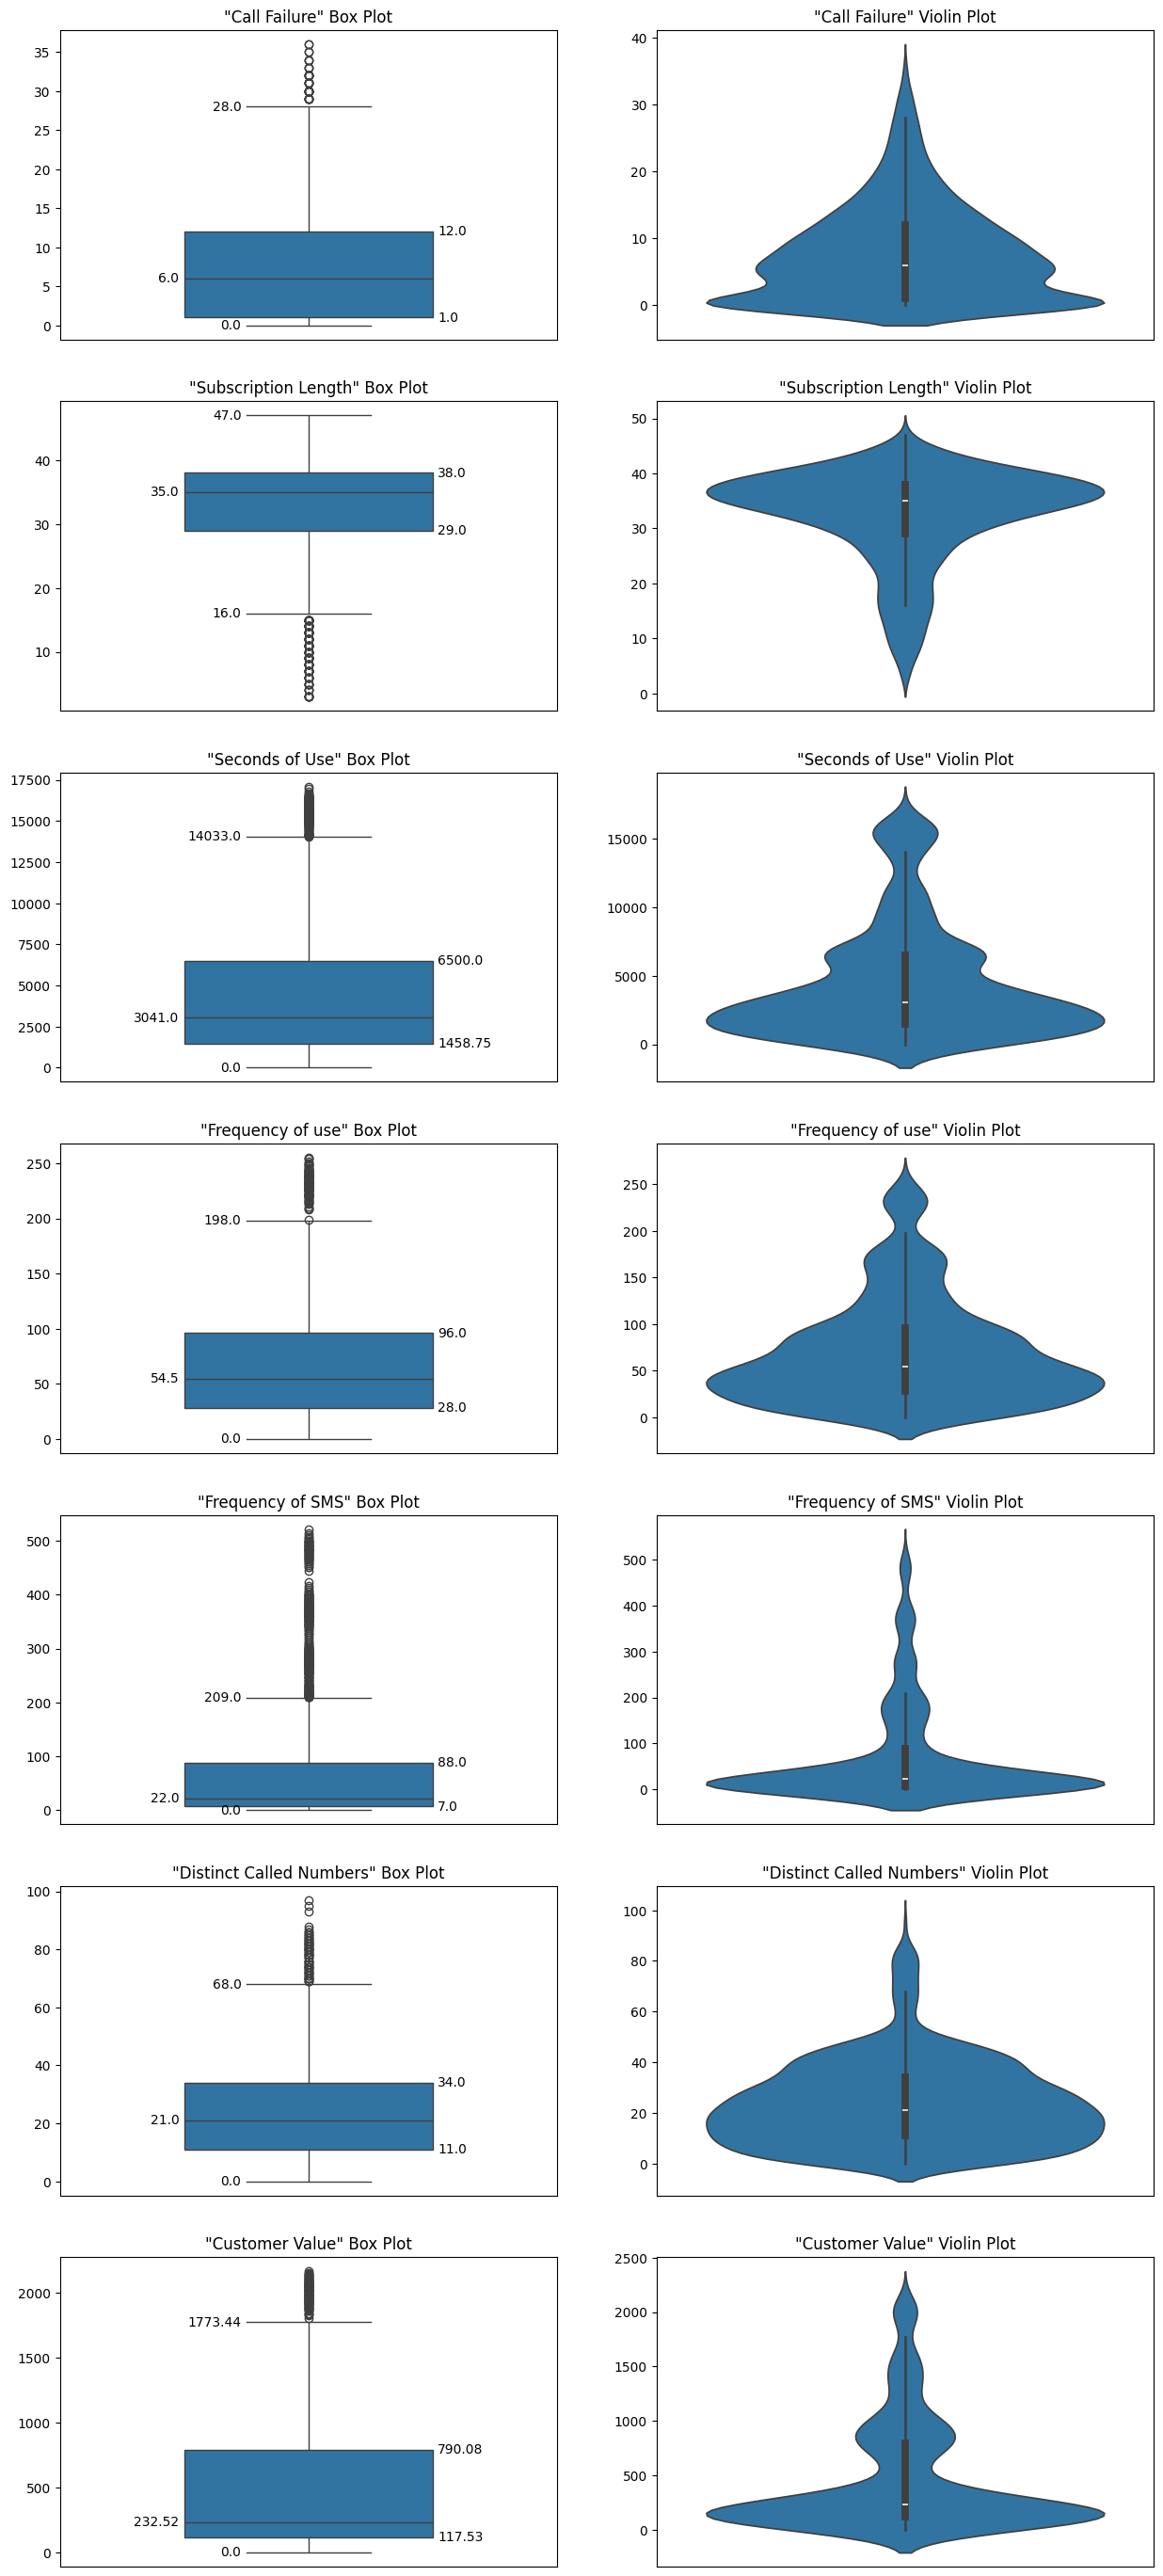

In [46]:
_, axes = plt.subplots(
   nrows=len(numerical_features.columns), 
   ncols=2,
   figsize=(15, 35)
)

for count, feature in enumerate(iterable=numerical_features):
    boxplot = sns.boxplot(
        data=numerical_features[feature],
        width=0.5,
        ax=axes[count, 0]
    )

    boxplot.set_title(label=f'''"{feature}" Box Plot''')
    boxplot.set_ylabel(ylabel=None)
    boxplot.set_xticks(ticks=list())

    x_Q1, y_Q1 = boxplot.get_lines()[0].get_xydata()[0]
    boxplot.text(
        x=x_Q1 + 0.26, 
        y=y_Q1,
        s=round(
            number=y_Q1,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="left"
    )

    x_Q3, y_Q3 = boxplot.get_lines()[1].get_xydata()[0]
    boxplot.text(
        x=x_Q3 + 0.26, 
        y=y_Q3,
        s=round(
            number=y_Q3,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="left"
    )

    x_lower_bound, y_lower_bound = boxplot.get_lines()[2].get_xydata()[0]
    boxplot.text(
        x=x_lower_bound - 0.01, 
        y=y_lower_bound,
        s=round(
            number=y_lower_bound,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="right"
    )

    x_upper_bound, y_upper_bound = boxplot.get_lines()[3].get_xydata()[0]
    boxplot.text(
        x=x_upper_bound - 0.01, 
        y=y_upper_bound,
        s=round(
            number=y_upper_bound,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="right"
    )

    x_median, y_median = boxplot.get_lines()[4].get_xydata()[0]
    boxplot.text(
        x=x_median - 0.01, 
        y=y_median,
        s=round(
            number=y_median,
            ndigits=2
        ),
        verticalalignment="center",
        horizontalalignment="right"
    )
    
    sns.violinplot(
        data=df[feature],
        ax=axes[count, 1]
    ).set(
        title=f'''"{feature}" Violin Plot''',
        xticks=list(),
        ylabel=None
    )

gambar di atas terdiri dari dua plot, yakni (1) box plot di sisi sebelah kiri dan (2) violin plot di sebelah kanan untuk tiap feature numerik
1. [Box plot](https://en.wikipedia.org/wiki/Box_plot) is a method for demonstrating graphically the locality, spread and skewness of numerical data through their quartiles. Components of the plot are as follows:
    * The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25^{th}\;(Q1)$ and $75^{th}\;(Q3)$
    percentiles. Untuk contoh feature `Customer Value` di atas, `Q1` dan `Q3` masing-masing bernilai `117.53` dan `790.08`
    * The horizontal line inside the box marks the median ($50\%$) of the distribution. Melanjutkan contoh sebelumnya, median dari `Customer Value` adalah `232.52`
    * The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(Q1-1.5\;\cdot\;IQR,\;Q3+1.5\;\cdot\;IQR)$, where $IQR=Q3-Q1$ is the interquartile range.
    * Outliers that fall outside of the range bounded by the whiskers are plotted individually as black points along the central axis.
        * Pada contoh `Customer Value`, data di atas nilai `1773.44` merupakan outlier pada feature ini
        * Dan tampak bahwa semua feature memiliki outlier

2. Violin plots have many of the same summary statistics as box plots:
    * the white dot represents the median
    * the thick gray bar in the center represents the interquartile range
    * the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers”
    * On each side of the gray line is a kernel density estimation to show the distribution shape of the data. 
        * Wider sections of the violin plot represent a higher probability that members of the population will take on the given value
        * The skinnier sections represent a lower probability
        * visualisasi ini kurang lebih serupa dengan yang telah ditunjukkan oleh KDE plot sebelumnya

* In addition to graphical tools, the exact numerical statistics of the distribution are also provided below
    * especially corresponding with the values provided in the box plot and violin plot
    * Its output is mostly self-explanatory. `25%`, `50%` and `75%` are the corresponding percentiles (`50%` juga bisa disebut dengan median)

In [35]:
numerical_features\
    .describe()\
        .round(decimals=2)

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Customer Value
count,2850.00,2850.00,2850.00,2850.00,2850.00,2850.00,2850.00
mean,7.80,32.45,4534.24,70.48,73.79,23.87,474.99
std,7.33,8.72,4199.71,57.40,112.06,17.19,514.44
min,0.00,3.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,29.00,1458.75,28.00,7.00,11.00,117.53
50%,6.00,35.00,3041.00,54.50,22.00,21.00,232.52
75%,12.00,38.00,6500.00,96.00,88.00,34.00,790.08
max,36.00,47.00,17090.00,255.00,522.00,97.00,2165.28


#### Categorical Variable

Berikutnya adalah analisis untuk categorical features, which take on a fixed number of values. 
* Each of these values assigns an observation to a corresponding group, known as a category, which reflects some qualitative property of this example. 
* Binary variables are an important special case of categorical variables when the number of possible values is exactly 2. 
* If the values of a categorical variable are ordered, it is called ordinal.
* seperti halnya dalam feature numerik, visualisasi berikut akan menampilkan 6 categorical feature yang terbagi dalam 2 baris dan 3 kolom
* target variabel `Churn` akan dibahas secara terpisah dan tidak disertakan dalam tahap ini

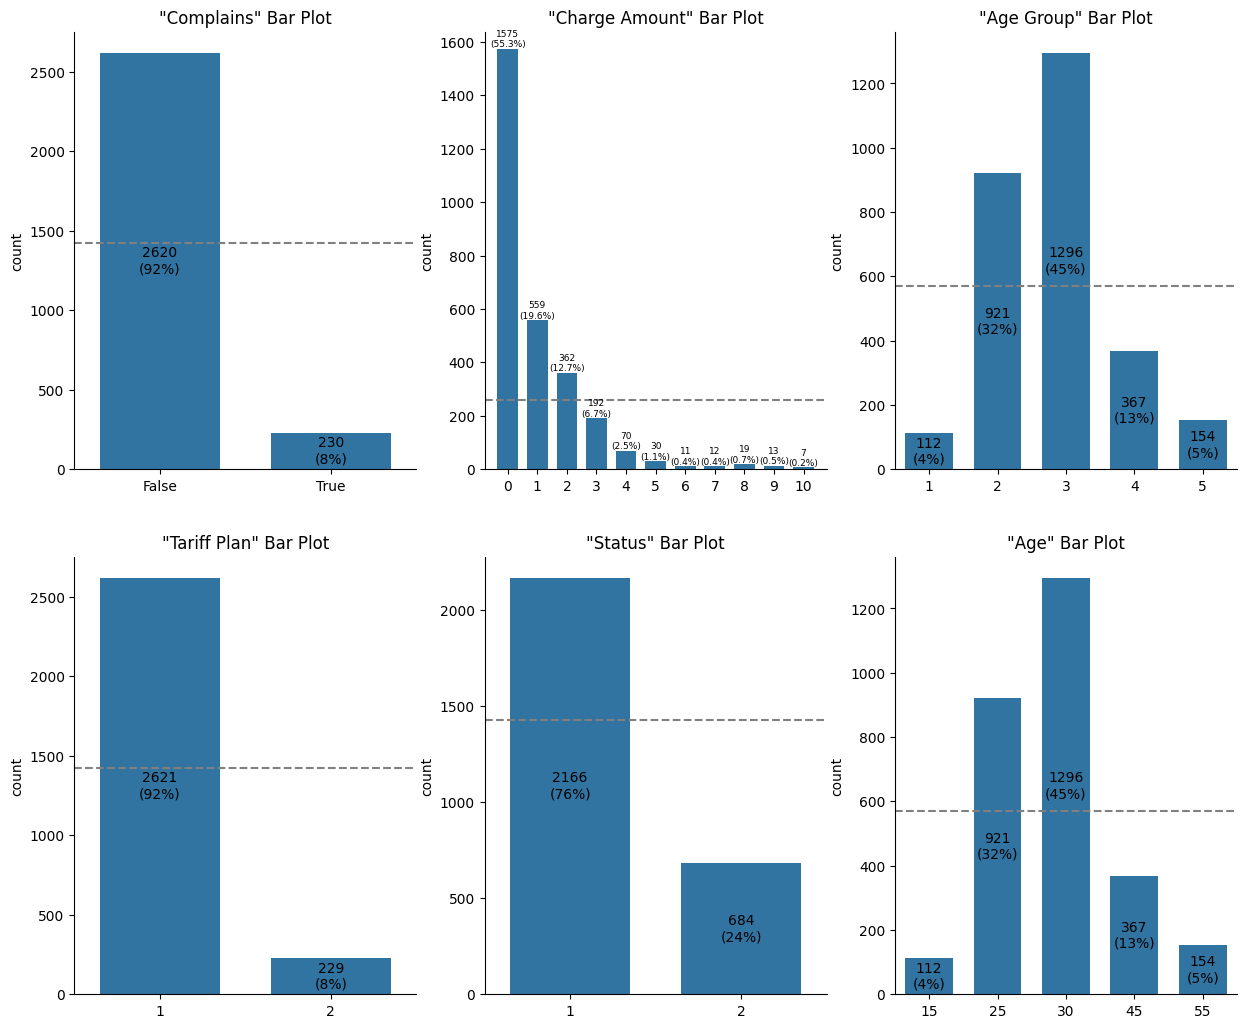

In [88]:
plt.figure(figsize=(15, 12.5))

def plot_categorical_feature(ndigits=None, label_type="center", fontsize=10):
    plt.subplot(2, 3, count + 1)

    data = pd.concat(
        objs=[df[feature].value_counts().sort_index(),
              df[feature].value_counts(normalize=True).mul(other=100)],
        axis=1
    )

    axes = sns.barplot(
        data=data, 
        x=data.index,
        y="count",
        width=0.7
    )

    axes.set_title(label=f'''"{feature}" Bar Plot''')
    axes.set_xlabel(xlabel=None)
    axes.spines.top.set_visible(b=False)
    axes.spines.right.set_visible(b=False)

    plt.axhline(
        y=df[feature].value_counts().mean(),
        color="grey",
        linestyle="dashed"
    )

    labels = [f"{round(value.get_height())}\n({round(number=data.iloc[index, 1], ndigits=ndigits)}%)"
              for index, value in enumerate(axes.containers[0])]
    
    axes.bar_label(
        container=axes.containers[0], 
        labels=labels, 
        label_type=label_type,
        fontsize=fontsize
    )

    return axes

categorical_features = df.select_dtypes(include=["bool", "object"]).drop(columns="Churn")

for count, feature in enumerate(iterable=categorical_features):
    if feature == "Charge Amount":
        axes = plot_categorical_feature(
            ndigits=1,
            label_type="edge",
            fontsize=6.5
        )
        axes.margins(0.04)
    elif feature == "default":
        plot_categorical_feature(
            label_type="edge",
            fontsize=9
        )
    else:
        plot_categorical_feature()

While the histograms, discussed above, and bar plots may look similar, there are several differences between them:

* Histograms are best suited for looking at the distribution of numerical variables, while bar plots are used for categorical features.
* The values on the X-axis in the histogram are numerical; a bar plot can have any type of values on the X-axis: numbers, strings, booleans.
* The histogram’s X-axis is a Cartesian coordinate axis along which values cannot be changed; the ordering of the bars is not predefined. 
    * Still, it is useful to note that the bars are often sorted by height —that is, the frequency of the values— seperti yang ditunjukkan pada ninary feature `Complains`, `Tariff Plan`, dan `Status`
    * nilai proporsi dari frekuensi tersebut terhadap total data juga disertakan dalam format persentase
    * Also, when we consider ordinal variables (like `Charge Amount`, `Age Group`, and `Age` in our data), the bars are usually ordered by variable value

interpretasi dari bar plot di atas adalah sebagai berikut:
* binary features: mayoritas pelanggan Telecom tidak melayangkan `Complains`, Tariff Plan bertipe `Pay as you go (1)`, dan berstatus sebagai pelanggan `Active (1)` pada Iranian Telecom
* ordinal features: kebanyakan pelanggan memiliki Charge Amount yang relatif rendah (berkisar antara `0 - 2`) dan berada pada kelompok usia `2 - 3`
    * But, as we want to be able to predict the minority class, we may be more interested in how the fewer accepting customers behave. 
    * It may well be other values (occupation) in `job` bar plot contains most of our subscribers.
    * *untuk feature `Age` tampak bahwa distribusinya sama persis dengan feature `Age Group`. analisis pada bagian berikutnya ... dapat memberikan konfirmasi lanjutan apakah kedua variabel ini sama persis atau memiliki perbedaan*

selain itu, perlu diperhatikan juga bahwa terdapat beberapa label dalam variabel kategorikal tertentu dengan proporsi yang lebih rendah relatif terhadap label lainnya dalam variabel yang sama
* batasan yang digunakan umumnya bersifat arbitrary (misal 1% atau 5% dari total proporsi label tersebut); dalam project ini digunakan nilai rata-rata dari frekuensi tiap label untuk menentukan label yang jarang muncul atau sering disebut dengan rare label
* pada contoh variabel `Charge Amount`, maka label dengan frekuensi di bawah rata-rata mulai dari `3 - 10` akan ditentukan sebagai rare label
* untuk feature binary yang hanya terdiri dari 2 label, umumnya akan terdapat 1 predominant category, dan label lainnya secara otomatis menjadi rare label karena berada di bawah rerata jumlah count dari 2 label
* rare label menjadi permasalahan utama dalam tahapan prediksi data, yakni menentukan apakah rare label memang memiliki kemampuan prediktif atau hanya sebagai noise yang menurunkan kemampuan model untuk generalized terhadap new data.